In [3]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
#Load Data
df = pd.read_csv('Test.csv')
df.head()

,Kuis,Task,UTS,UAS,Final_Score,Target,Status
0,84,54,61,55,63.50,Pass,1
1,44,42,50,40,44.00,Failed,0
2,93,74,72,40,69.75,Pass,1
3,72,49,63,64,62.00,Pass,1
4,100,98,96,61,88.75,Pass,1


In [5]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kuis         50 non-null     int64  
 1   Task         50 non-null     int64  
 2   UTS          50 non-null     int64  
 3   UAS          50 non-null     int64  
 4   Final_Score  50 non-null     float64
 5   Target       50 non-null     object 
 6   Status       50 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.9+ KB


In [6]:
# Menghitung persentase duplikasi
percentage_duplicates = (df.duplicated().sum() / df.shape[0]) * 100

print("Jumlah duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data
print(f"Persentase duplikasi: {percentage_duplicates:.2f}%")

Jumlah duplikasi :  0
Persentase duplikasi: 0.00%


In [7]:
df.describe() #Memeriksa Parameter Statistik

,Kuis,Task,UTS,UAS,Final_Score,Status
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000
mean,71.280000,66.960000,64.66000,64.580000,66.870000,0.70000
std,21.391434,22.262772,23.30596,17.779936,12.855976,0.46291
min,31.000000,32.000000,30.00000,31.000000,41.000000,0.00000
25%,52.250000,49.000000,41.75000,52.000000,58.312500,0.00000
50%,75.000000,61.500000,65.50000,64.000000,66.250000,1.00000
75%,90.500000,89.750000,83.00000,78.000000,72.687500,1.00000
max,100.000000,100.000000,100.00000,96.000000,93.750000,1.00000


In [8]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [9]:
print("Jumlah Duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


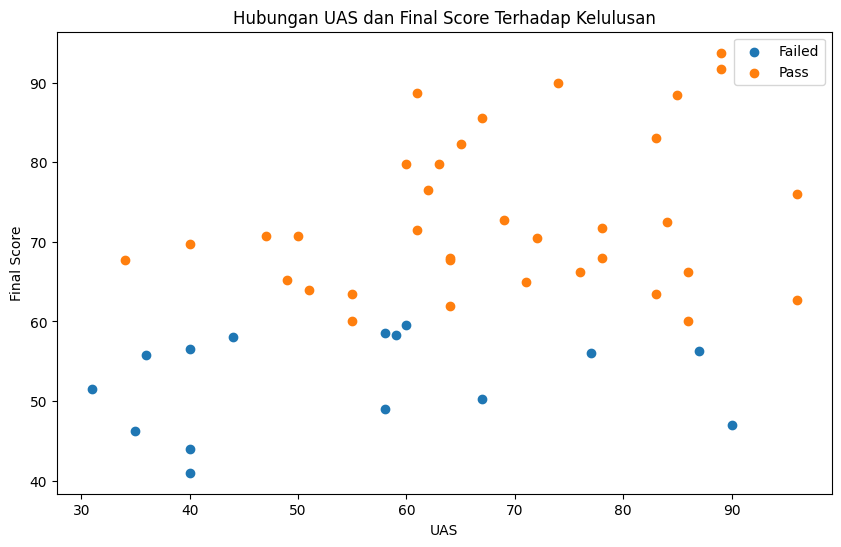

In [14]:
plt.figure(figsize=(10,6))

#Status = 0 (Failed)
plt.scatter(x = df[df['Status']==0]['UAS'], y = df.Final_Score[df.Status==0])
#Status = 1 (Pass)
plt.scatter(x = df[df['Status']==1]['UAS'], y = df.Final_Score[df.Status==1],);

plt.title("Hubungan UAS dan Final Score Terhadap Kelulusan")
plt.xlabel("UAS")
plt.ylabel("Final Score")
plt.legend(["Failed", "Pass"])

Text(0, 0.5, 'Final Score')

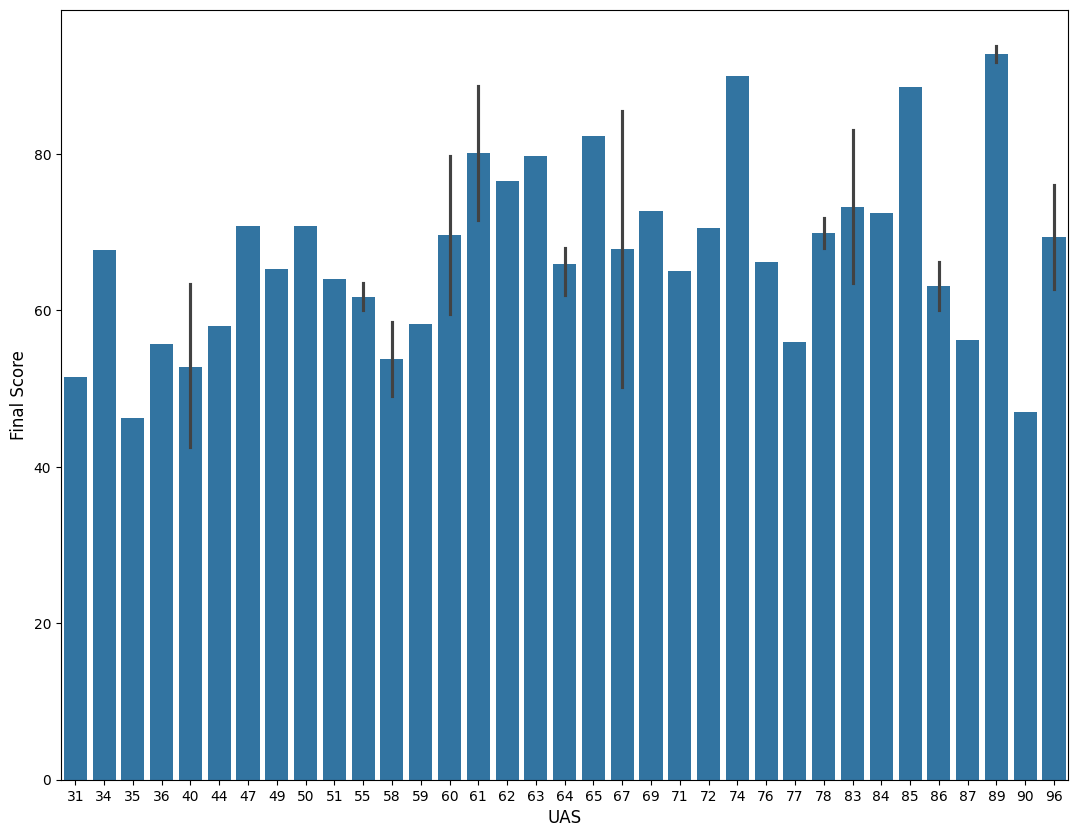

In [16]:
plt.figure(figsize=(13,10))
sns.barplot(x=df["UAS"],y=df["Final_Score"])
plt.xlabel('UAS',fontsize=12)
plt.ylabel('Final Score',fontsize=12)

In [17]:
#Feature Engineering
#Mengganti Kolom Status
df["Status"].replace({"Pass" : 1,
                   "Failed" : 0}, inplace=True)

df.head()

,Kuis,Task,UTS,UAS,Final_Score,Target,Status
0,84,54,61,55,63.50,Pass,1
1,44,42,50,40,44.00,Failed,0
2,93,74,72,40,69.75,Pass,1
3,72,49,63,64,62.00,Pass,1
4,100,98,96,61,88.75,Pass,1


In [20]:
#Persiapan data menjadi model
sc=StandardScaler()
X=df.drop('Target',axis=1)
Y=df['Target']
df=sc.fit(X).transform(X)

In [21]:
#Pisahkan data train dan test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)


In [22]:
#Menyusun model, evaluasi dan klasifikasi
def model(X_train,y_train):
    models=[]
    #XGBoost
    xgb=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1)
    xgb.fit(X_train,y_train)
    models.append(xgb)



In [23]:
models=model(X_train,y_train) #Penampung Nilai X Train dan y Train

In [24]:
Model=['XgBoost']

In [25]:
# Inisialisasi model-modelnya
gb = GradientBoostingClassifier()

# Fit model ke data latih
gb.fit(X_train, y_train)

# Simpan model dalam sebuah list
models = [gb]

# Menghitung Akurasi
train_accuracy=[]
test_accuracy=[]
for i in range(len(models)):
    yhat = models[i].predict(X_test)
    yhat_t = models[i].predict(X_train)
    train_accuracy.append(accuracy_score(yhat_t, y_train))
    test_accuracy.append(accuracy_score(yhat, y_test))

In [26]:
Accuracy_score=pd.DataFrame({
    'Model':Model,
    'Train_Accuracy':train_accuracy,
    'Test_Accuracy':test_accuracy
})

In [27]:
Accuracy_score #Melihat Skor Akurasi

,Model,Train_Accuracy,Test_Accuracy
0,XgBoost,1.0,1.0


In [28]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) #Membuat Dictionary Dari Hasil Akurasi
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])} #Mengurutkan Dictionary Berdasarkan Nilai Akurasi